In [1]:
import pandas as pd
#data = pd.read_csv("data_analysis.csv", encoding= 'unicode_escape')
data = pd.read_csv("new_data.csv", encoding= 'unicode_escape')

In [2]:
data

,City,before,during,reason,Unnamed: 4,access,hour work,hour park,desired,importance,why,gender,ethnicity,age,education,employment,marriage,income,difference,trend
0,"Campinas, SÃ£o Paulo",1-2 times/week,1-2 times/month,Exercise (e.g. running and hiking);Reduce stre...,NaN,0,8,1.0,1.0,4,For me it's important spend time in the nature...,Male,0,30,2,Employed full-time(40+ hours a week),Single,2,-1,0
1,Los Angeles,1-2 times/week,1-2 times/month,Exercise (e.g. running and hiking);Feel more r...,NaN,0,8,0.5,1.0,4,Spending time in nature makes me mentally and ...,Male,0,30,2,Employed full-time(40+ hours a week),Single,3,-1,1
2,memphis.tn,1-2 times/week,1-2 times/month,"Exercise (e.g. running and hiking), Time with ...",NaN,0,2,2.0,2.0,5,to have a good time,male,0,25,2,Employed full-time(40+ hours a week),Married,3,-1,1
3,"Vancouver, BC",1-2 times/yr,1-2 times/month,Dog Walking;Exercise (e.g. running and hiking)...,NaN,0,25,2.0,5.0,4,Because you need to get a sufficient amount of...,Female,0,19,1,Unemployed (currently looking for work),Single,2,1,1
4,"MIAMI , FLORIDA",3-6 times/week,1-2 times/month,"Contemplative space, Socializing, Feel more re...",SIGHTING GIRLS,0,8,1.0,1.0,4,IT IS IMPORTANT SPEND TIME WITH NATURE IT MAK...,MALE,0,29,2,Employed full-time(40+ hours a week),Single,4,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"Roseville, CA",3-6 times/week,Daily,Dog Walking;Contemplative space;Feel more rela...,It gives me a chance to interact with other pe...,1,0,1.0,2.0,5,It's what keeps me sane! Being out in nature i...,Female,1,66,2,Retired,Single,2,1,1
146,"Alabama , USA",3-6 times/week,Daily,"Dog Walking, Exercise (e.g. running and hiking...",NaN,1,3,2.0,1.0,5,To live a Healthy Life with out any Stress .. ...,Male,1,32,3,Employed full-time(40+ hours a week),Married,3,1,1
147,brooklyn,Daily,Daily,Dog Walking;Exercise (e.g. running and hiking)...,NaN,1,5,5.0,5.0,5,naturlal brathing is important so go out site,male,1,26,2,Employed full-time(40+ hours a week),Married,2,0,1
148,"Albany, New York",Daily,Daily,Exercise (e.g. running and hiking);Contemplati...,NaN,1,5,1.0,3.0,5,It reduces stress being outside and appreciati...,female,1,68,2,Employed part-time (less than 40 hours a week),Divorced,2,0,1


## Multiple Linear Regression

In [3]:
import random
import numpy as np
import statsmodels.api as sm

In [6]:
import statsmodels.formula.api as smf

In [4]:
access = data["access"]
ethnicity = data["ethnicity"]
education = data["education"]
income = data["income "]

In [7]:
random.seed(0)
m = smf.ols(formula='access ~ ethnicity + education + income', data=data).fit()

In [8]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 access   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.467
Date:                Mon, 19 Jul 2021   Prob (F-statistic):              0.226
Time:                        22:54:54   Log-Likelihood:                -64.897
No. Observations:                 150   AIC:                             137.8
Df Residuals:                     146   BIC:                             149.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7083      0.134      5.297      0.0

In [83]:
m.pvalues[1]

0.04477995809931086

In [10]:
m.params[1]

0.1270009800090241

In [91]:
m.mse_total

0.14425055928411634

In [11]:
a = smf.ols(formula='difference ~ access', data=data).fit()
print(a.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.546
Date:                Mon, 19 Jul 2021   Prob (F-statistic):              0.113
Time:                        23:00:28   Log-Likelihood:                -222.06
No. Observations:                 150   AIC:                             448.1
Df Residuals:                     148   BIC:                             454.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8846      0.210     -4.213      0.0

In [12]:
dd = smf.ols(formula='difference ~ ethnicity + education + income ', data=data).fit()

In [13]:
print(dd.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6608
Date:                Mon, 19 Jul 2021   Prob (F-statistic):              0.577
Time:                        23:00:58   Log-Likelihood:                -222.33
No. Observations:                 150   AIC:                             452.7
Df Residuals:                     146   BIC:                             464.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9370      0.382     -2.453      0.0

In [116]:
d2 = smf.ols(formula='difference ~ ethnicity + education + income + access', data=data).fit()
print(d2.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.109
Date:                Mon, 31 May 2021   Prob (F-statistic):              0.355
Time:                        23:33:01   Log-Likelihood:                -221.08
No. Observations:                 150   AIC:                             452.2
Df Residuals:                     145   BIC:                             467.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1970      0.415     -2.884      0.0

In [117]:
d2.mse_total

1.157986577181208

In [140]:
t = smf.ols(formula='trend ~ ethnicity + education + income', data=data).fit()
print(t.summary())

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7353
Date:                Mon, 24 May 2021   Prob (F-statistic):              0.533
Time:                        23:02:57   Log-Likelihood:                 167.76
No. Observations:                 152   AIC:                            -327.5
Df Residuals:                     148   BIC:                            -315.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9627      0.031     31.331      0.0

## Linear Regression with Bootstrap

In [14]:
data_size = data.shape[0]
sims = 1000

In [15]:
random.seed(0)
rsquared_boot = []
p = []
beta = []
mse = []
for i in range(sims):
    bst = data.sample(n=data_size, replace=True)
    access = bst["access"]
    ethnicity = bst["ethnicity"]
    education = bst["education"]
    income = bst["income "]
    p.append(smf.ols(formula='access ~ ethnicity + education + income', data=bst).fit().pvalues[1])
    rsquared_boot.append(smf.ols(formula='access ~ ethnicity + education + income', data=bst).fit().rsquared)
    beta.append(smf.ols(formula='access ~ ethnicity + education + income', data=bst).fit().params[1])
    mse.append(smf.ols(formula='access ~ ethnicity + education + income', data=bst).fit().mse_total)

In [16]:
#p-value
np.mean(p) 

0.14974082608577077

In [17]:
#coefficient
np.mean(beta)

0.12763319581052432

In [18]:
#R2
np.mean(rsquared_boot)

0.046461011810557666

In [19]:
#mean square error 
np.mean(mse)

0.1437959731543624

In [20]:
random.seed(0)
rsquared_boot = []
p = []
beta = []
mse = []
for i in range(sims):
    bst = data.sample(n=data_size, replace=True)
    access = bst["access"]
    ethnicity = bst["ethnicity"]
    education = bst["education"]
    income = bst["income "]
    p.append(smf.ols(formula='difference ~ ethnicity + education + income + access', data=bst).fit().pvalues[3])
    rsquared_boot.append(smf.ols(formula='difference ~ ethnicity + education + income + access', data=bst).fit().rsquared)
    beta.append(smf.ols(formula='difference ~ ethnicity + education + income + access', data=bst).fit().params[3])
    mse.append(smf.ols(formula='difference ~ ethnicity + education + income + access', data=bst).fit().mse_total)

In [21]:
np.mean(p)

0.2786491263947523

In [22]:
np.mean(beta)

0.14492804442761562

In [23]:
np.mean(rsquared_boot)

0.05488881496951428

In [24]:
np.mean(mse)

1.1561447874720356

In [25]:
beta = []
p = []
for i in range(sims):
    bst = data.sample(n=data_size, replace=True)
    access = bst["access"]
    ethnicity = bst["ethnicity"]
    education = bst["education"]
    income = bst["income "]
    p.append(smf.ols(formula='difference ~ access', data=bst).fit().pvalues[1])
    rsquared_boot.append(smf.ols(formula='difference ~ access', data=bst).fit().rsquared)
    beta.append(smf.ols(formula='difference ~ access', data=bst).fit().params[1])

In [26]:
np.mean(p)

0.2240740797561268

In [27]:
np.mean(beta)

0.3611532954568183

In [28]:
np.mean(rsquared_boot)

0.03843578461763496

In [29]:
np.mean(mse)

1.1561447874720356

In [30]:
#confidence interval 
eth_p_95_ci = np.percentile(p, [2.5, 97.5])
print("R Squared 95% CI = {}".format(eth_p_95_ci))

R Squared 95% CI = [4.46984228e-04 8.83025820e-01]


In [31]:
r_sq_95_ci = np.percentile(rsquared_boot, [2.5, 97.5])
print("R Squared 95% CI = {}".format(r_sq_95_ci))

R Squared 95% CI = [0.00048432 0.11921906]


## Graph

In [32]:
words = data ["why"]

In [35]:
string = ""
for i in words:
    string += i 

In [34]:
string.lower()

"for me it's important spend time in the nature to keep fit and healthy.spending time in nature makes me mentally and physically healthyto have a good timebecause you need to get a sufficient amount of sun to be healthy as well as e0ugh excercise. it is also very good for your mental health it is important spend time with nature  it makes  life positivityit gives me lots of stress relief in work and also connecting to nature gives lots of positive energy to me.because it is relaxing and it is part of our lifeconnected to nature is more effective for my healthy life.importantit's a way to calm and relax your mind after a long day. as we reconnect with nature, we remember the wonderful works of god during creation. good to get outdoors for fresh air and experience nature.  good for change of scenery, to recharge oneself.it is nice to be outdoors and get away from being inside the house all the timei think it is important to spend time in nature primarily to reduce stress and to simply ge

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
new_string = (re.sub(r'[^\w\s]', '', string)).lower()

In [40]:
stopwords = set(STOPWORDS)
stopwords.update(["nature","important","think","make","give","makes"])

In [41]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800, height=400).generate(new_string)

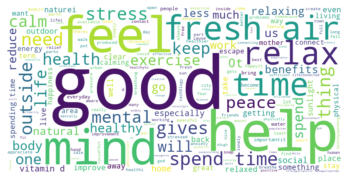

<Figure size 432x288 with 0 Axes>

In [42]:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.figure()
wordcloud.to_file('importance.png')

In [192]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158509 sha256=376d91185b3402d93e130733814c646ace32a2739b9f4bb16354f650dac750be
  Stored in directory: /Users/senlingshu/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.
